# import library

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

# import dataset

In [145]:
df = pd.read_excel('hargaRumahJaksel.xlsx', header=None)

# pre proccessing data

In [146]:
#menampilkan 5 baris awal tabel
df.head()

,0,1,2,3,4,5,6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HARGA,LT,LB,JKT,JKM,GRS,KOTA
2,28000000000,1100,700,5,6,ADA,JAKSEL
3,19000000000,824,800,4,4,ADA,JAKSEL
4,4700000000,500,400,4,3,ADA,JAKSEL


In [147]:
#membuat nama kolom
df.columns = ['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA']
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HARGA,LT,LB,JKT,JKM,GRS,KOTA
2,28000000000,1100,700,5,6,ADA,JAKSEL
3,19000000000,824,800,4,4,ADA,JAKSEL
4,4700000000,500,400,4,3,ADA,JAKSEL


In [148]:
#hapus baris 1 dan 2 karena tidak bernilai
df = df.drop([0,1])
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
2,28000000000,1100,700,5,6,ADA,JAKSEL
3,19000000000,824,800,4,4,ADA,JAKSEL
4,4700000000,500,400,4,3,ADA,JAKSEL
5,4900000000,251,300,5,4,ADA,JAKSEL
6,28000000000,1340,575,4,5,ADA,JAKSEL


In [149]:
#menyederhanakan harga rumah
df["HARGA"] = df["HARGA"] / 1000000000
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
2,28.0,1100,700,5,6,ADA,JAKSEL
3,19.0,824,800,4,4,ADA,JAKSEL
4,4.7,500,400,4,3,ADA,JAKSEL
5,4.9,251,300,5,4,ADA,JAKSEL
6,28.0,1340,575,4,5,ADA,JAKSEL


In [150]:
#mengecek apakah ada missing data
df.isnull().sum()

HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
KOTA     0
dtype: int64

In [151]:
#mengubah attribute garasi yang semula bernilai "ADA" menjadi 1, dan "TIDAK ADA" menjadi 0
df["GRS"] = df["GRS"].replace({"ADA" : 1, "TIDAK ADA" : 0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13756\3378427142.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["GRS"] = df["GRS"].replace({"ADA" : 1, "TIDAK ADA" : 0})


In [152]:
#mengubah tipe data menjadi numeric yang semulanya bertipe data objek
kolom_numerik = ['HARGA', 'LT', 'LB', 'JKT', 'JKM']
df[kolom_numerik] = df[kolom_numerik].apply(pd.to_numeric, errors='coerce')


print(df.dtypes)

HARGA    float64
LT         int64
LB         int64
JKT        int64
JKM        int64
GRS        int64
KOTA      object
dtype: object


In [153]:
# menghilangkan feature yang tidak relevan / tidak penting

#hapus kolom jaksel karena semua nilainya sama
df = df.drop(columns=["KOTA"])
df.head()

,HARGA,LT,LB,JKT,JKM,GRS
2,28.0,1100,700,5,6,1
3,19.0,824,800,4,4,1
4,4.7,500,400,4,3,1
5,4.9,251,300,5,4,1
6,28.0,1340,575,4,5,1


### penjelasan data

In [154]:
# menampilkan jumlah baris dan kolom
df.shape

(1001, 6)

In [155]:
#rangkuman statistik deskrptif dari dataframe
df.describe()

,HARGA,LT,LB,JKT,JKM,GRS
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,17.474719,530.504496,487.275724,4.457542,3.940060,0.778222
std,20.795482,531.069773,452.872262,2.004606,1.903261,0.415650
min,0.430000,22.000000,38.000000,1.000000,1.000000,0.000000
25%,6.750000,220.000000,300.000000,4.000000,3.000000,1.000000
50%,13.500000,400.000000,411.000000,4.000000,4.000000,1.000000
75%,20.000000,677.000000,600.000000,5.000000,4.000000,1.000000
max,250.000000,6790.000000,10000.000000,27.000000,27.000000,1.000000


<Axes: >

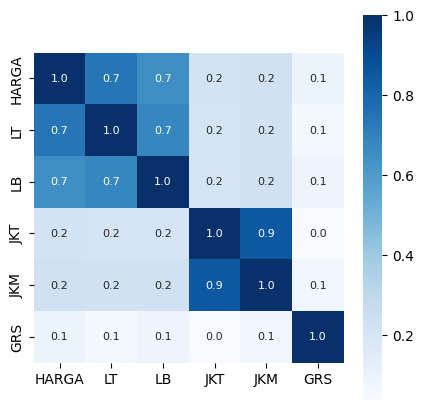

In [156]:
#memahami korelasi antar feature data set menggunakan heatmap

correlation = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# split data

In [157]:
#split feature dan lable
x = df.drop(['HARGA'], axis=1)
y = df['HARGA']

print(x)
print(y)

        LT   LB  JKT  JKM  GRS
2     1100  700    5    6    1
3      824  800    4    4    1
4      500  400    4    3    1
5      251  300    5    4    1
6     1340  575    4    5    1
...    ...  ...  ...  ...  ...
998    488  550    6    5    1
999    209  270    4    4    1
1000   692  400    4    3    0
1001   102  140    4    3    0
1002    63  110    3    3    0

[1001 rows x 5 columns]
2       28.00
3       19.00
4        4.70
5        4.90
6       28.00
        ...  
998     16.00
999      4.50
1000    29.00
1001     1.70
1002     1.25
Name: HARGA, Length: 1001, dtype: float64


In [158]:
#split data menjadi training data dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

print(x_train)
print(y_test)


#pembagian data menjadi set pelatihan dan pengujian akan sama setiap kode di jalankan
#test size 0.2 berarti test datanya 20%

       LT    LB  JKT  JKM  GRS
177   477   520    4    3    1
512  1470  2000    7    7    1
455   806   700    4    4    1
376   200   400    4    4    1
202    78   185    4    4    0
..    ...   ...  ...  ...  ...
536   462   350    3    3    1
586   164   150    4    4    1
495   435   500    4    4    1
529   389   450    7    4    1
170   663   530    7    8    1

[800 rows x 5 columns]
39     14.00
400    16.00
386     9.00
826     9.50
813     5.30
       ...  
658     7.90
979     3.25
558    37.50
827    14.50
654     6.90
Name: HARGA, Length: 201, dtype: float64


## training data_train menggunakan model XGBRegressor

In [159]:
# model training xgboost regressor

#load model
model = XGBRegressor()

#training the model with x_train
model.fit(x_train, y_train)

#accuracy for prediction on training data
training_data_prediction = model.predict(x_train)


In [160]:
print(training_data_prediction)

[ 17.468586    56.054314    22.89443      7.9358497    3.362512
  17.874311    18.390982    18.103266     2.1758986    5.7659135
   7.45101      7.152392    38.398037    12.713751    19.543682
  15.163834    21.948202    12.713751    11.908856    28.948011
  16.783052     3.5723932    8.449343    16.835531    18.249546
  95.080635    11.600906     6.0712347    3.2565658   12.15824
   5.812495     5.04381      1.4419106    8.626579     5.313303
  39.96017     22.272797     6.5407796   14.291966    17.832727
   9.489257    38.202408     9.143236    35.247356     5.762112
  17.90341      5.263362    21.697899    15.426278    16.515026
  21.0701       9.506914    15.2997265   12.431794    21.905327
  14.18404     38.185036     4.684193    21.119595     5.1533203
  89.651405    24.71963     17.869814     6.0648103   10.877067
  11.071405     6.902593    15.7731495   21.154797     9.341688
  10.832391    15.089819    21.905327     0.6401717   28.015509
  16.511774    12.7623      55.865143  

## hasil evaluasi dari model XGBRegressor

In [161]:

print('MAE:', mean_absolute_error(y_train, training_data_prediction))
print('MSE:', mean_squared_error(y_train, training_data_prediction))
print('R-squared:', r2_score(y_train, training_data_prediction))

MAE: 0.6913657571357487
MSE: 1.2178059830209438
R-squared: 0.9975112333350129


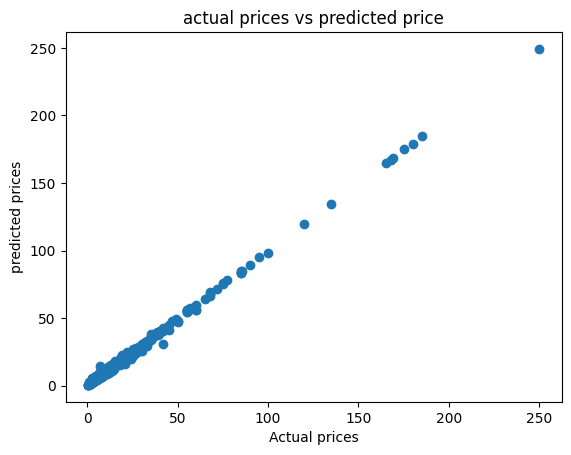

In [162]:
#memvisualisasi actual prices dengan predicted prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted price")
plt.show()

# evaluasi performa model dengan data testing

In [163]:
#prediction on test data
test_data_prediction = model.predict(x_test)

In [164]:
print('MAE:', mean_absolute_error(y_test, test_data_prediction))
print('MSE:', mean_squared_error(y_test, test_data_prediction))
print('R-squared:', r2_score(y_test, test_data_prediction))

MAE: 5.500986564361042
MSE: 126.7312420191101
R-squared: 0.37407099511169584


## memprediksi harga rumah dengan model dengan decision tree

In [165]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_train)

In [166]:
print('Decision Tree:')
print('MAE:', mean_absolute_error(y_train, dt_predictions))
print('MSE:', mean_squared_error(y_train, dt_predictions))
print('R-squared:', r2_score(y_train, dt_predictions))

Decision Tree:
MAE: 0.029229166666666674
MSE: 0.038374479166666677
R-squared: 0.9999215760754441


In [167]:

dt_predictions = dt_model.predict(x_test)

In [168]:
print('Decision Tree:')
print('MAE:', mean_absolute_error(y_test, dt_predictions))
print('MSE:', mean_squared_error(y_test, dt_predictions))
print('R-squared:', r2_score(y_test, dt_predictions))

Decision Tree:
MAE: 6.45762023217247
MSE: 213.4010002902156
R-squared: -0.0539932665828482
